/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 95.93%


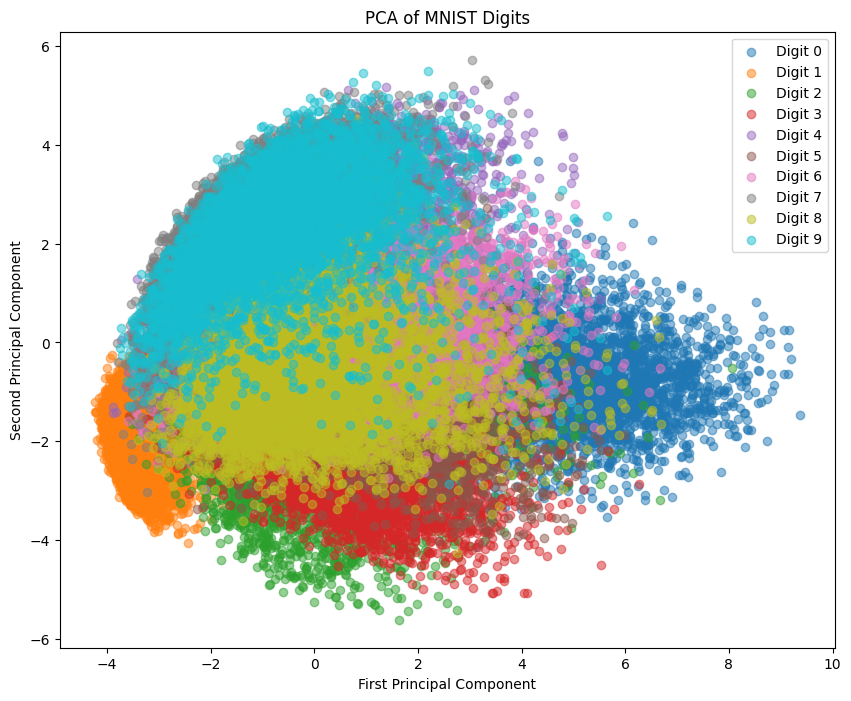

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal


mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(int)

# Step 2: Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: PCA for each class to capture 90% variance (This step remains unchanged)
pca_dict = {}
for digit in range(10):
    pca = PCA(n_components=0.9)
    X_train_digit = X_train[y_train == digit]
    pca.fit(X_train_digit)
    pca_dict[digit] = pca

# Step 4: PCA on the entire training set, keeping the first 42 components
pca_all = PCA(n_components=42)
X_train_pca = pca_all.fit_transform(X_train)

# Step 5: Estimate the parameters (mean, covariance) for each class in the first 10 PCs
class_params = {}
for digit in range(10):
    X_train_digit_pca = X_train_pca[y_train == digit]
    mean = np.mean(X_train_digit_pca, axis=0)
    cov = np.cov(X_train_digit_pca.T)
    class_params[digit] = {'mean': mean, 'cov': cov}

# Step 6: Classification using the test set with the first 10 PCs
X_test_pca = pca_all.transform(X_test)
y_pred = []
for i in range(X_test_pca.shape[0]):
    likelihoods = []
    for digit in range(10):
        mean = class_params[digit]['mean']
        cov = class_params[digit]['cov']
        likelihood = multivariate_normal.pdf(X_test_pca[i], mean=mean, cov=cov)
        likelihoods.append(likelihood)
    y_pred.append(np.argmax(likelihoods))

# Step 7: Evaluate the success rate (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optional: Visualize the first two principal components (if desired)
plt.figure(figsize=(10, 8))
for digit in range(10):
    idx = np.where(y_train == digit)
    plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], label=f'Digit {digit}', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('PCA of MNIST Digits')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of components: 2, Accuracy: 45.91%
Number of components: 3, Accuracy: 49.91%
Number of components: 4, Accuracy: 62.67%
Number of components: 5, Accuracy: 72.33%
Number of components: 6, Accuracy: 79.19%
Number of components: 7, Accuracy: 82.90%
Number of components: 8, Accuracy: 85.60%
Number of components: 9, Accuracy: 87.46%
Number of components: 10, Accuracy: 88.69%
Number of components: 11, Accuracy: 89.25%
Number of components: 12, Accuracy: 91.09%
Number of components: 13, Accuracy: 91.89%
Number of components: 14, Accuracy: 92.42%
Number of components: 15, Accuracy: 92.39%
Number of components: 16, Accuracy: 93.16%
Number of components: 17, Accuracy: 93.47%
Number of components: 18, Accuracy: 93.91%
Number of components: 19, Accuracy: 94.14%
Number of components: 20, Accuracy: 94.46%
Number of components: 21, Accuracy: 94.66%
Number of components: 22, Accuracy: 94.89%
Number of components: 23, Accuracy: 94.85%
Number of components: 24, Accuracy: 94.99%
Number of component

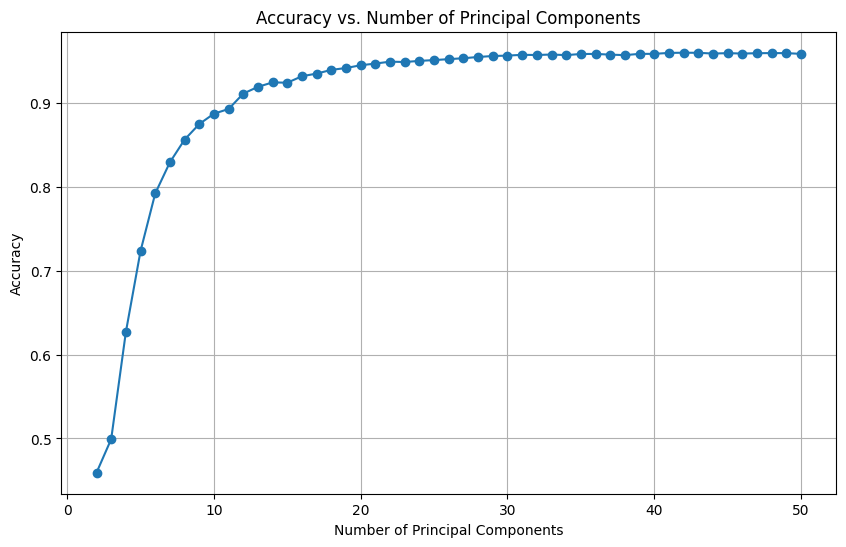

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize the data to [0, 1] range
y = mnist.target.astype(int)

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store results
components_range = list(range(2, 51))  # Testing from 2 to 50 components
accuracies = []

for n_components in components_range:
    # Step 1: Perform PCA with n_components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Step 2: Estimate the parameters (mean, covariance) for each class in the first n_components PCs
    class_params = {}
    for digit in range(10):
        X_train_digit_pca = X_train_pca[y_train == digit]
        mean = np.mean(X_train_digit_pca, axis=0)
        cov = np.cov(X_train_digit_pca.T)
        class_params[digit] = {'mean': mean, 'cov': cov}

    # Step 3: Classification using the test set with n_components PCs
    y_pred = []
    for i in range(X_test_pca.shape[0]):
        likelihoods = []
        for digit in range(10):
            mean = class_params[digit]['mean']
            cov = class_params[digit]['cov']
            likelihood = multivariate_normal.pdf(X_test_pca[i], mean=mean, cov=cov)
            likelihoods.append(likelihood)
        y_pred.append(np.argmax(likelihoods))

    # Step 4: Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Number of components: {n_components}, Accuracy: {accuracy * 100:.2f}%')

# Step 5: Identify the best number of components
best_n_components = components_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f'\nBest number of components: {best_n_components}, Best Accuracy: {best_accuracy * 100:.2f}%')

# Plot the accuracy vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.show()
